In [1]:
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0  1157k      0  0:00:01  0:00:01 --:--:-- 1158k


In [2]:
import pandas as pd

df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
df.shape

(11231, 26)

In [4]:
df.isnull().values.any()

True

In [5]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [6]:
df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [7]:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [8]:
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


In [9]:
df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [10]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


In [13]:
import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,0,0.0
1,1,1,5,DTW,MSP,0,0.0
2,1,1,5,ATL,SEA,0,0.0
3,1,1,5,SEA,MSP,0,0.0
4,1,1,5,SEA,DTW,0,0.0


In [14]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,0,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,0,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,0,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,0,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,0,0.0,0,0,0,0,1,0,1,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

In [16]:
train_x.shape

(8984, 14)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.simplefilter("ignore")

In [25]:
table=pd.DataFrame(columns=["Model","Accuracy","ROC AUC"])
def record(model_name,accuracy,RA):
    global table
    table=table.append(pd.DataFrame([[model_name,accuracy,RA]],columns=["Model","Accuracy","ROC AUC"]))
    table.reset_index(drop=True,inplace=True)

In [26]:
alg_count=0
while alg_count<3:
    if alg_count == 0:
        parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],"penalty":["l1","l2"]}
        alg = LogisticRegression(multi_class="auto",random_state=13)
        model_name = "Logistic Regression"
        model =  GridSearchCV(alg, parameters, cv=3)
    elif alg_count == 1:
        parameters = {"max_depth": [2,3,4,5,6,7,8]}
        alg = DecisionTreeClassifier(random_state=13)
        model_name = "Decision Trees"
        model =  GridSearchCV(alg, parameters, cv=3)
    elif alg_count == 2:
        parameters = {"n_estimators": [50, 100, 200, 400, 800]}
        alg = RandomForestClassifier(random_state=13)
        model_name = "Random Forests"
        model =  GridSearchCV(alg, parameters, cv=3)
    model.fit(train_x, train_y)
    predicted = model.predict(test_x)
    accuracy = model.score(test_x, test_y)
    print("Model: ", model_name)
    print("Accuracy = ", accuracy)
    probabilities = model.predict_proba(test_x)
    RA = roc_auc_score(test_y, probabilities[:, 1])
    print("ROC AUC Score = ", RA)
    print("Confusion Matrix = ", confusion_matrix(test_y, predicted))
    train_predictions = model.predict(train_x)
    print("Best Estimator: ", "{}\n".format(model.best_estimator_))
    print("Best Hyper-parameters: ", model.best_params_)
    print("\n\n")
    record(model_name,accuracy,RA)
    alg_count+=1

Model:  Logistic Regression
Accuracy =  0.8615932354250111
ROC AUC Score =  0.5151969121203264
Confusion Matrix =  [[1936    0]
 [ 311    0]]
Best Estimator:  LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l1', random_state=13, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Best Hyper-parameters:  {'C': 0.001, 'penalty': 'l1'}



Model:  Decision Trees
Accuracy =  0.8629283489096573
ROC AUC Score =  0.6845229000026574
Confusion Matrix =  [[1897   39]
 [ 269   42]]
Best Estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

Best Hyper-paramete

In [54]:
table.head()

,Model,Accuracy,ROC AUC
0,Logistic Regression,0.861593,0.515197
1,Decision Trees,0.862928,0.684523
2,Random Forests,0.846462,0.681242


Visualizing Results

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

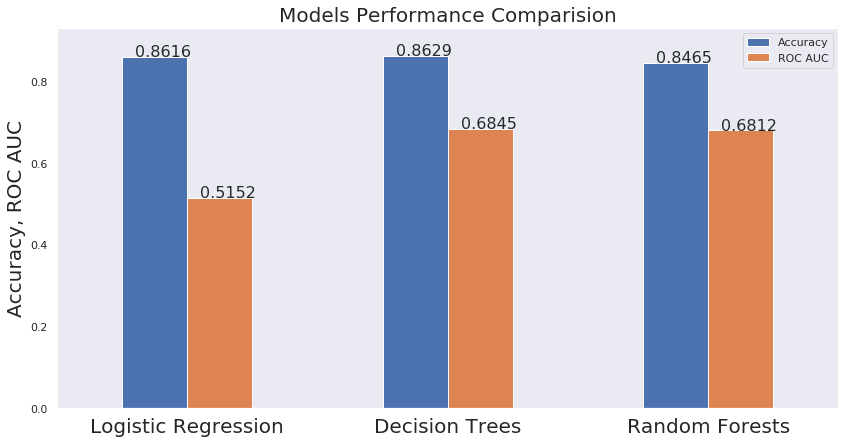

In [60]:
ax=table.plot(x="Model", y=["Accuracy","ROC AUC"], kind="bar", figsize=(14,7), legend=True)
ax.grid(False)
plt.title("Models Performance Comparision", fontsize = 20)
plt.xlabel("")
plt.xticks(rotation='horizontal',fontsize = 20)
plt.margins(x=0, y=0.08)
plt.ylabel("Accuracy, ROC AUC", fontsize = 20)
for i in ax.patches:
    value=round(i.get_height(),4)
    ax.text(x=i.get_x()+0.05, y=i.get_height(), s=str(value), fontsize=16, color="#232b2b")

You may try: Linear SVM, Gaussian Naive Bayes, Adaptive Boosting

Just import followings:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

Accordingly, set parameters and alg.